# **TMA TM341**

---


Name: Ahmed Mohamed Abdullatif Rifai.

ID: 1851711008.

# **Question 1**

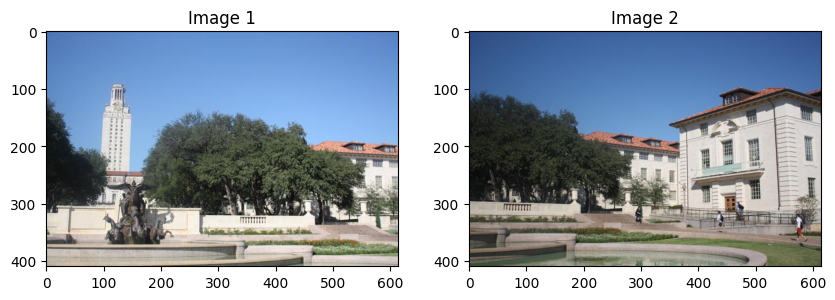

In [10]:
import cv2
import numpy              as np
import matplotlib.pyplot  as plt

# --- Part (a): Read and display images ---

def read_image_RPG(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Read the images
img1 = read_image_RPG('uttower1.jpg')
img2 = read_image_RPG('uttower2.jpg')

# Display the images horizontally
plt.figure(figsize=(10, 5))  # Adjust figure size as needed

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st image
plt.imshow(img1)
plt.title('Image 1')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd image
plt.imshow(img2)
plt.title('Image 2')

plt.show()

Number of keypoints in Image 1: 2006
Number of keypoints in Image 2: 1604


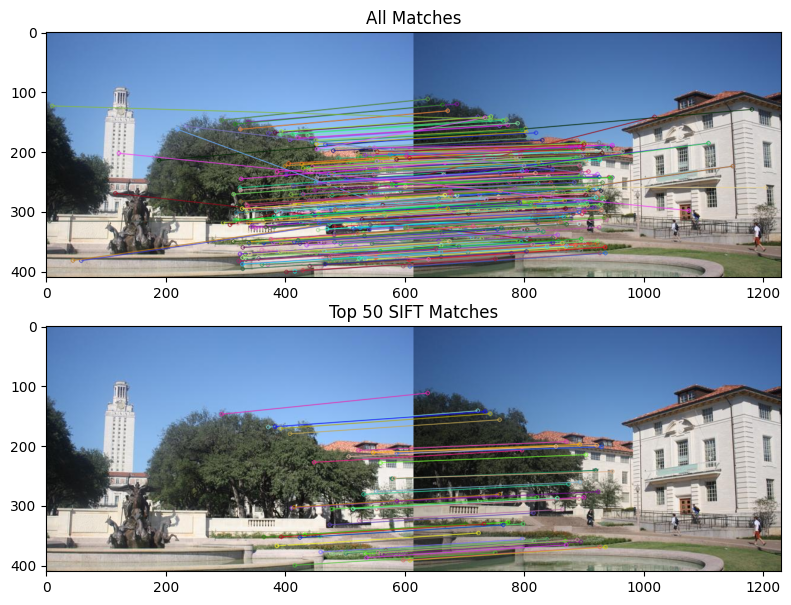

In [20]:
# --- Part (b): SIFT Feature Extraction ---
# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT object and detect keypoints and descriptors
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)  # Keypoints and descriptors for image 1
kp2, des2 = sift.detectAndCompute(gray2, None)  # Keypoints and descriptors for image 2

# Print the number of keypoints detected in each image
print(f"Number of keypoints in Image 1: {len(kp1)}")
print(f"Number of keypoints in Image 2: {len(kp2)}")


# --- Part (c): Feature Matching ---
# Create a Brute-Force Matcher object
bf = cv2.BFMatcher()
# Find the k best matches for each descriptor (k=2 in this case)
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to select good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Check if distance ratio is below threshold
        good_matches.append(m)

# Sort good matches based on distance and select the top 50
good_matches = sorted(good_matches, key=lambda x: x.distance)
top_50_matches = good_matches[:50]

# Draw matches on the images
All_img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
Top_img_matches = cv2.drawMatches(img1, kp1, img2, kp2, top_50_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the images with matches
plt.figure(figsize=(15, 7))  # Adjust figure size as needed

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st image
plt.imshow(cv2.cvtColor(All_img_matches, 0))
plt.title('All Matches')

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd image
plt.imshow(cv2.cvtColor(img_matches, 0))
plt.title('Top 50 SIFT Matches')

plt.show()

Homography Matrix:
 [[ 7.64045525e-01  3.90676700e-02  2.67694134e+02]
 [-1.36200240e-01  9.12264897e-01  4.57080957e+01]
 [-3.54916491e-04 -5.15637562e-05  1.00000000e+00]]


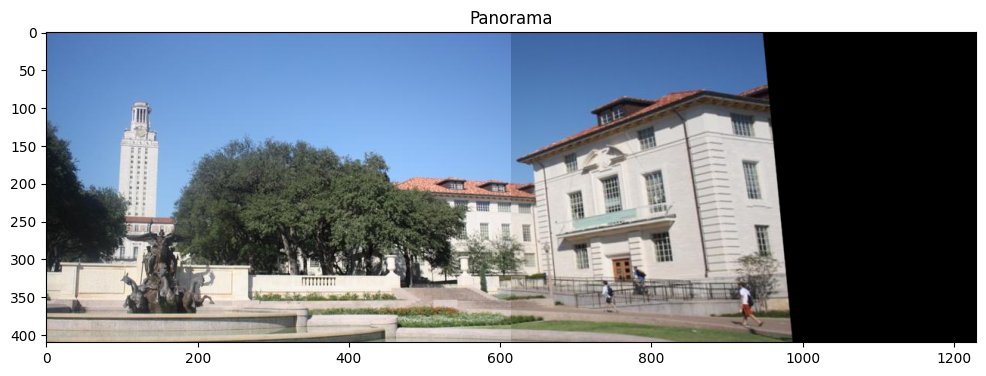

In [31]:
# --- Part (d): Homography and Panorama ---
# This code snippet aims to create a panorama by stitching two images together. It uses keypoint matching, homography estimation, and image warping techniques to achieve this.

# Extract coordinates of matched keypoints in both images
# src_pts: Keypoints from the first image (query image)
# dst_pts: Keypoints from the second image (train image)
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find the homography matrix using RANSAC algorithm, The homography matrix represents the transformation that maps points from one image to the corresponding points in the other image.
# M: Homography matrix
# mask: Inliers/outliers mask
M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
print("Homography Matrix:\n", M)

# Get the dimensions of the images
h1, w1 = img1.shape[:2]  # Height and width of image 1
h2, w2 = img2.shape[:2]  # Height and width of image 2

# Calculate the panorama dimensions to determine the size of the final panorama image.
panorama_width = w1 + w2
panorama_height = h1

# Warp the second image using the homography matrix, This warping aligns the second image with the perspective of the first image, preparing it for stitching.
warped_img2 = cv2.warpPerspective(img2, M, (panorama_width, panorama_height))

# Create the panorama by stitching the images together
panorama = warped_img2.copy()
panorama[0:h1, 0:w1] = img1  # Overlay image 1 onto the warped image 2

# Display the panorama
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(panorama, 0)) #added cv2.cvtColor to display the image in the format Matplotlib expects.
plt.title('Panorama')
plt.show()

# **Question 2**

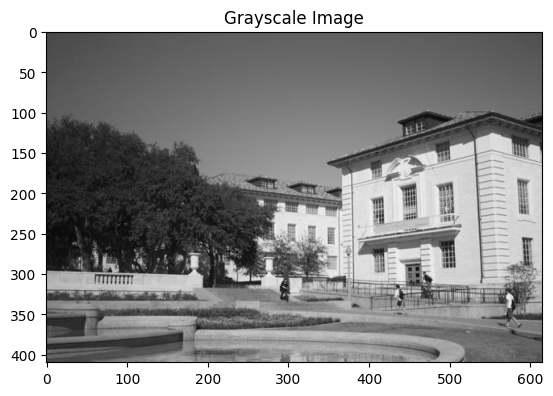

In [43]:
import cv2
import numpy              as np
import matplotlib.pyplot  as plt

# --- Part a: Read and grayscale ---

# Load the image
img = cv2.imread('uttower2.jpg')
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

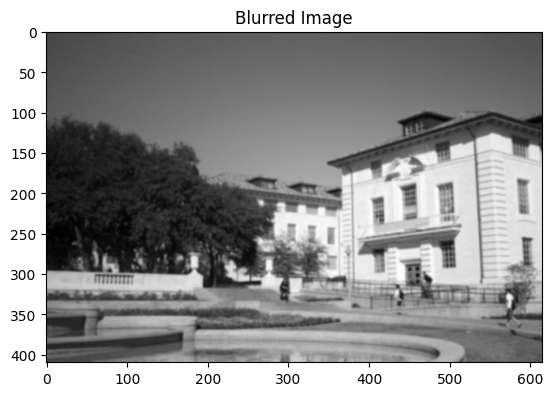

In [44]:
# --- Part b: Gaussian Blur ---

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Display the blurred image
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.show()

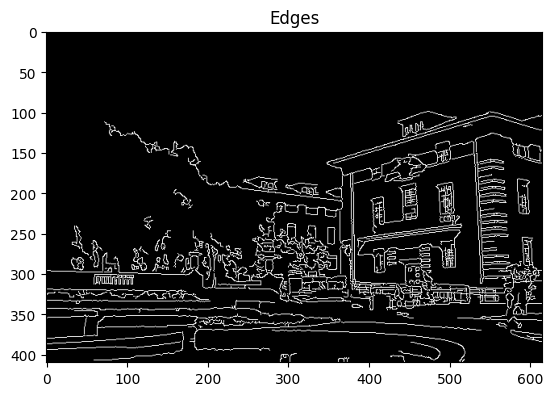

In [45]:
# --- Part c: Canny Edge Detection ---

# Detect edges using the Canny algorithm
edges = cv2.Canny(blurred, 50, 150)
# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.show()

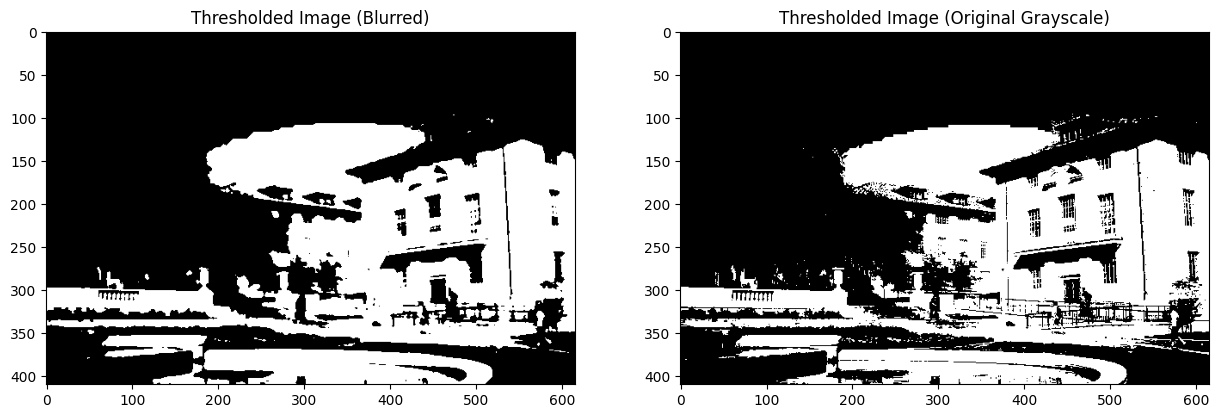

In [46]:
# --- Part d: Otsu's Thresholding ---

# Apply Otsu's thresholding to the blurred image
ret1, thresh1 = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Apply Otsu's thresholding to the original grayscale image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display both thresholded images side-by-side for comparison
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Thresholded Image (Blurred)')

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image (Original Grayscale)')
plt.show()

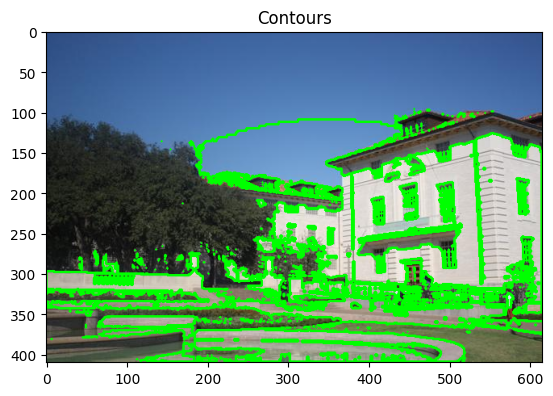

In [47]:
# --- Part e: Contour Detection and Drawing ---

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Create a copy of the original image to draw contours on
img_contours = img.copy()
# Draw all contours on the image in green
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)
# Display the image with contours
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB)) # Ensure RGB for Matplotlib
plt.title('Contours')
plt.show()

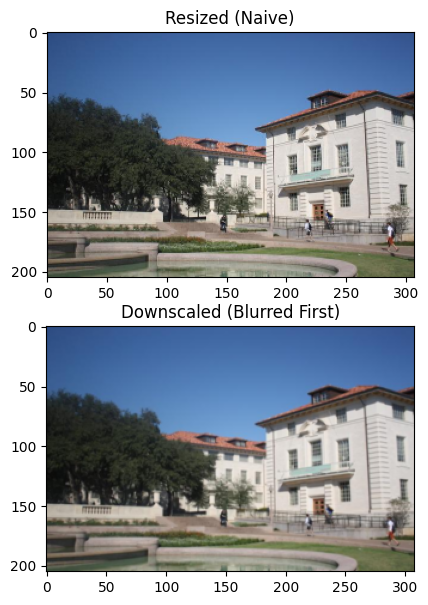

In [48]:
# --- Part f: Resize and Downscale ---

# Get original image dimensions
original_height, original_width = img.shape[:2]
# Calculate new dimensions for resizing
new_width = original_width // 2
new_height = original_height // 2
# Resize the image using the calculated dimensions
resized = cv2.resize(img, (new_width, new_height))

# Downscale the image using pyrDown (Gaussian blur and subsampling)
downscaled = cv2.pyrDown(img)
# Alternative downscaling using resize
downscaled_2 = cv2.resize(img, (new_width, new_height))

# Display the resized and downscaled images
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)) # Ensure RGB for Matplotlib
plt.title('Resized (Naive)')

plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(downscaled, cv2.COLOR_BGR2RGB)) # Ensure RGB for Matplotlib
plt.title('Downscaled (Blurred First)')
plt.show()

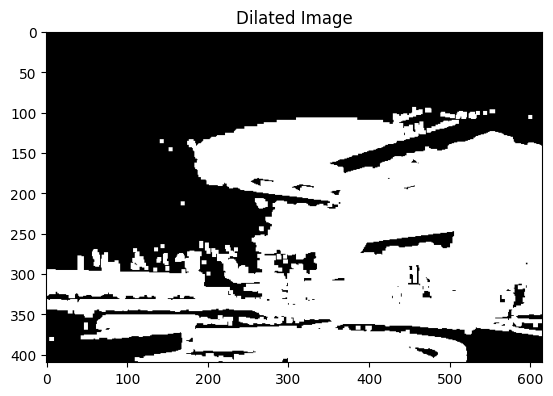

In [49]:
# --- Part g: Morphological Operation (Dilation) ---

# Define the kernel for dilation (a 5x5 square of ones)
kernel = np.ones((5, 5), np.uint8)
# Apply dilation to the thresholded image
dilated = cv2.dilate(thresh, kernel, iterations=1)
# Display the dilated image
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.show()

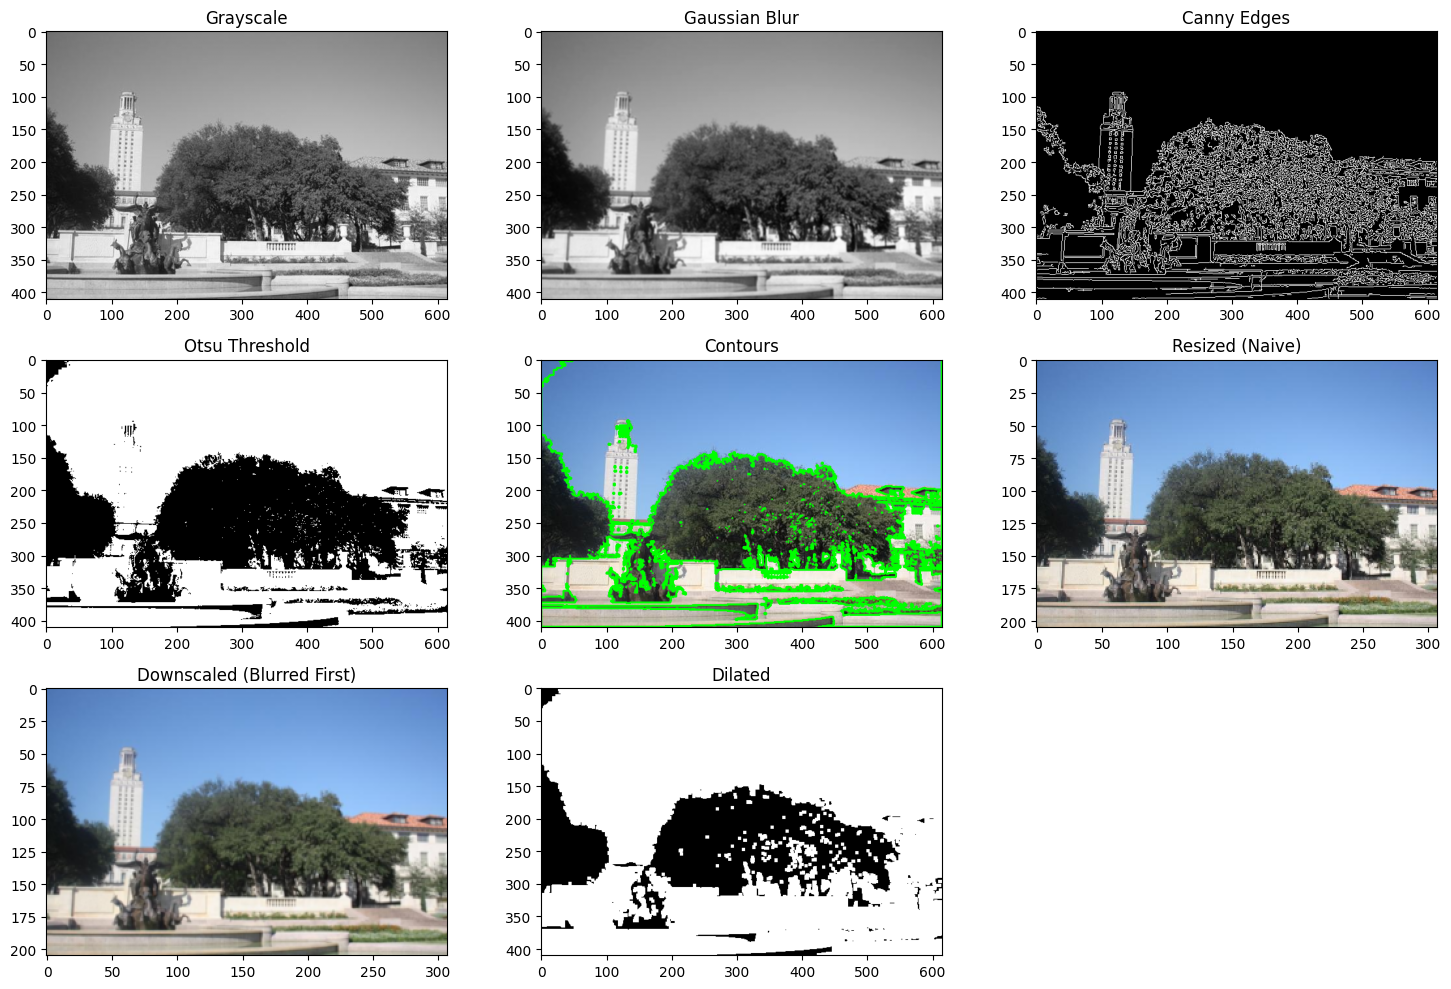

In [34]:
import cv2
import numpy              as np
import matplotlib.pyplot  as plt

# --- Part a: Read and grayscale ---
img = cv2.imread('/content/uttower1.jpg')  # Replace 'image.jpg' with your image file
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Part b: Gaussian Blur ---
blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Kernel size 5x5

# --- Part c: Canny Edge Detection ---
edges = cv2.Canny(gray, 50, 150) # Adjust thresholds as needed

# --- Part d: Otsu's Thresholding ---
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# --- Part e: Contour Detection and Drawing ---
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img.copy()  # Draw on a copy to preserve the original
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2) # Green contours, thickness 2


# --- Part f: Resize and Downscale ---
original_height, original_width = img.shape[:2]
new_width = original_width // 2
new_height = original_height // 2
resized = cv2.resize(img, (new_width, new_height))

# Downscale operation: Gaussian blur before resizing
blurred_before_resize = cv2.GaussianBlur(img, (5, 5), 0)
downscaled = cv2.resize(blurred_before_resize, (new_width, new_height))

# --- Part g: Morphological Operation (Dilation) ---
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated = cv2.dilate(thresh, kernel, iterations=1)


# --- Display Results ---
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')

plt.subplot(3, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Gaussian Blur')

plt.subplot(3, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.subplot(3, 3, 4)
plt.imshow(thresh, cmap='gray')
plt.title('Otsu Threshold')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB)) # Ensure RGB for Matplotlib
plt.title('Contours')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)) # Ensure RGB for Matplotlib
plt.title('Resized (Naive)')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(downscaled, cv2.COLOR_BGR2RGB)) # Ensure RGB for Matplotlib
plt.title('Downscaled (Blurred First)')

plt.subplot(3, 3, 8)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated')

plt.tight_layout()
plt.show()